## Modeling prior predictive distribution

In [2]:
import cmdstanpy
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

num_samples = 1000

# Compile the Stan model
model1 = cmdstanpy.CmdStanModel(stan_file='/home/3_Prior_and_Posterior_predictive_distributions/stan_model1.stan')

samples1 = model1.sample(data={"N":50},
                        fixed_param=True, 
                        iter_sampling=num_samples, 
                        iter_warmup=0, 
                        chains = 1)

/usr/local/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start processing
chain 1 |██████████| 00:00 Sampling completed                      


INFO:cmdstanpy:CmdStan done processing.


In [3]:
samples_df1 = samples1.draws_pd()
samples_df1.head()

,lp__,accept_stat__,y,p
0,0.0,0.0,11.0,0.158566
1,0.0,0.0,1.0,0.012287
2,0.0,0.0,7.0,0.180746
3,0.0,0.0,18.0,0.312993
4,0.0,0.0,9.0,0.136967


In [4]:
samples_df1['ratio'] = samples_df1['y'] / 50
samples_df1.head()

,lp__,accept_stat__,y,p,ratio
0,0.0,0.0,11.0,0.158566,0.22
1,0.0,0.0,1.0,0.012287,0.02
2,0.0,0.0,7.0,0.180746,0.14
3,0.0,0.0,18.0,0.312993,0.36
4,0.0,0.0,9.0,0.136967,0.18


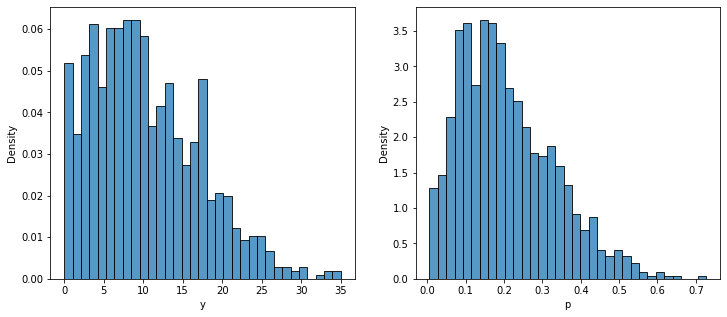

In [5]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12,5))
sns.histplot(data=samples_df1, x="y", stat="density", ax=ax[0], bins=33)
sns.histplot(data=samples_df1, x="p", stat="density", ax=ax[1], bins=33)
plt.show()

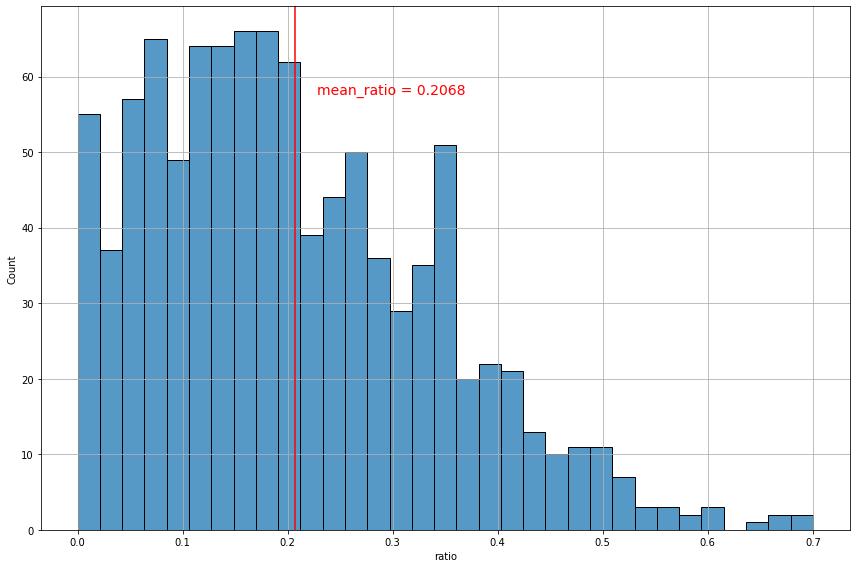

In [6]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12,8))
sns.histplot(data=samples_df1, x="ratio", ax=ax, bins=33)
mean_ratio = np.mean(samples_df1['ratio'])

y_min, y_max = plt.ylim()
plt.axvline(mean_ratio, color='red')
plt.text(1.1 * mean_ratio, (y_min + y_max)/(6/5), "mean_ratio = {}".format(mean_ratio), color='red', fontsize=14)
plt.grid()
plt.tight_layout()
plt.show()


## Modeling posterior and posterior predictive distribution

In [47]:
# Compile the Stan model
model2 = cmdstanpy.CmdStanModel(stan_file='/home/3_Prior_and_Posterior_predictive_distributions/stan_model2.stan')

samples2 = model2.sample(data={"N":50, 'y':7})

INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status





chain 1 |██████████| 00:00 Sampling completed
chain 2 |██████████| 00:00 Sampling completed
chain 3 |██████████| 00:00 Sampling completed
chain 4 |██████████| 00:00 Sampling completed

INFO:cmdstanpy:CmdStan done processing.


In [34]:
samples_df2 = samples2.draws_pd()
samples_df2.head()

,lp__,accept_stat__,stepsize__,treedepth__,n_leapfrog__,divergent__,energy__,p,y_pred
0,-25.7025,1.000000,0.853494,1.0,1.0,0.0,26.0911,0.190583,10.0
1,-25.9562,0.943162,0.853494,1.0,1.0,0.0,25.9820,0.204673,13.0
2,-25.7317,1.000000,0.853494,1.0,1.0,0.0,25.9392,0.192402,14.0
3,-25.5151,1.000000,0.853494,2.0,3.0,0.0,25.6864,0.176631,8.0
4,-25.4128,0.999749,0.853494,2.0,7.0,0.0,25.5112,0.135787,6.0


In [35]:
samples_df2['ratio'] = samples_df2['y_pred'] / 50
samples_df2.head()

,lp__,accept_stat__,stepsize__,treedepth__,n_leapfrog__,divergent__,energy__,p,y_pred,ratio
0,-25.7025,1.000000,0.853494,1.0,1.0,0.0,26.0911,0.190583,10.0,0.20
1,-25.9562,0.943162,0.853494,1.0,1.0,0.0,25.9820,0.204673,13.0,0.26
2,-25.7317,1.000000,0.853494,1.0,1.0,0.0,25.9392,0.192402,14.0,0.28
3,-25.5151,1.000000,0.853494,2.0,3.0,0.0,25.6864,0.176631,8.0,0.16
4,-25.4128,0.999749,0.853494,2.0,7.0,0.0,25.5112,0.135787,6.0,0.12


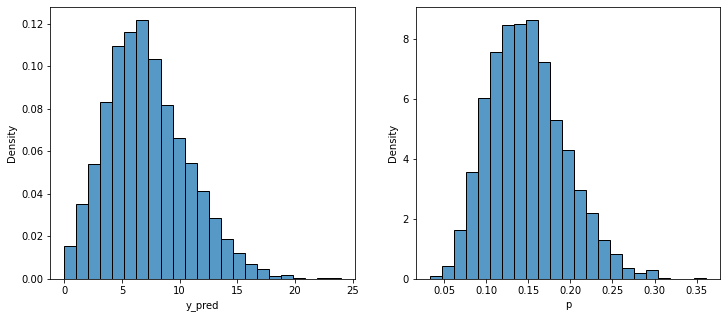

In [36]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12,5))
sns.histplot(data=samples_df2, x="y_pred", stat="density", ax=ax[0], bins=23)
sns.histplot(data=samples_df2, x="p", stat="density", ax=ax[1], bins=23)
plt.show()

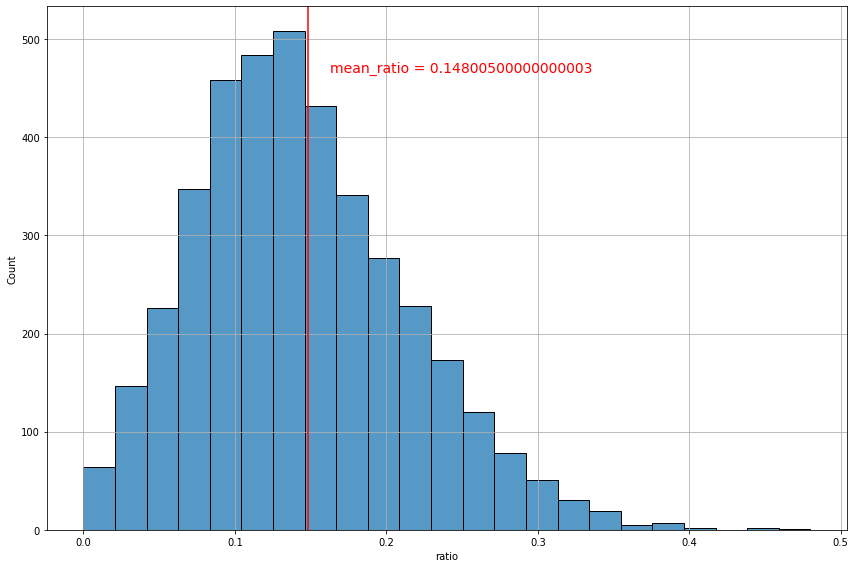

In [37]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12,8))
sns.histplot(data=samples_df2, x="ratio", ax=ax, bins=23)
mean_ratio = np.mean(samples_df2['ratio'])

y_min, y_max = plt.ylim()
plt.axvline(mean_ratio, color='red')
plt.text(1.1 * mean_ratio, (y_min + y_max)/(8/7), "mean_ratio = {}".format(mean_ratio), color='red', fontsize=14)
plt.grid()
plt.tight_layout()
plt.show()

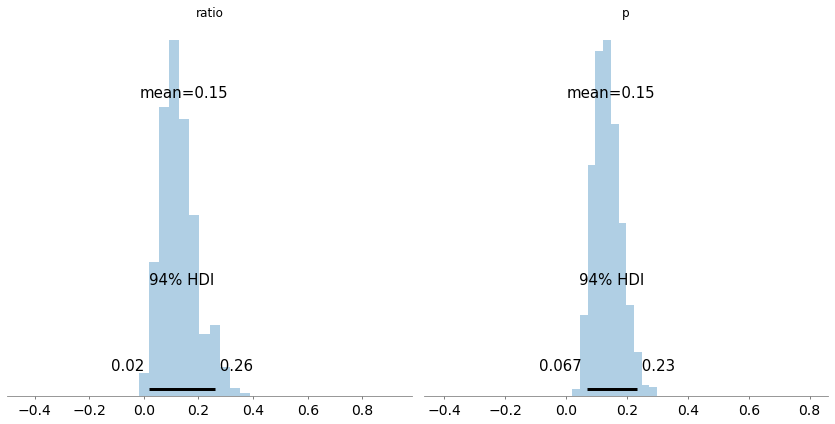

In [48]:
# 4
import arviz as az 
_, ax = plt.subplots(nrows=1, ncols=2, figsize=[12,6])
az.plot_posterior(samples_df2['ratio'].to_numpy(), kind='hist', hdi_prob=0.94, point_estimate='mean', ax=ax[0])
ax[0].set_title("ratio")
az.plot_posterior(samples_df2['p'].to_numpy(), kind='hist', hdi_prob=0.94, point_estimate='mean', ax=ax[1])
ax[1].set_title("p")
plt.tight_layout()
plt.show()

In [55]:
p = samples_df2['p'].to_numpy()
ratio = samples_df2['ratio'].to_numpy()
print("Ratio:\nMean:\t", round(mean_ratio,5), " \t94% HDI:\t", az.hdi(ratio, hdi_prob=0.94))
print("\np:\nMean:\t", round(np.mean(p),5), " \t94% HDI:\t", az.hdi(p, hdi_prob=0.94))

Ratio:
Mean:	 0.14801  	94% HDI:	 [0.02 0.26]

p:
Mean:	 0.14842  	94% HDI:	 [0.0673634 0.231337 ]


In [56]:
# 5
print(np.mean(ratio < 0.2))

0.75175


### stan_model1.stan
```
data {
    int<lower=0> N;
}

generated quantities {
  int<lower=0, upper=N> y;
  real<lower=0, upper=1> p = beta_rng(2, 8); // using beta distribution as prior
  y = binomial_rng(N, p);
}
```
### stan_model2.stan
```
data {
  int<lower=0> N;
  int<lower=0, upper=N> y;
}

parameters {
  real<lower=0, upper=1> p;
}

model {
  p ~ beta(2, 8);
  y ~ binomial(N, p);
}

generated quantities {
  int<lower=0, upper=N> y_pred = binomial_rng(N, p);
}
```